Saving archive (1).zip to archive (1).zip
✅ Total images: 506
🖼️ Image shape: (240, 240, 3), 🎯 Labels shape: (506,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,561 (49.36 MB)

 Trainable params: 12,938,561 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.5199 - loss: 0.9855 - val_accuracy: 0.6078 - val_loss: 0.6607
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.6184 - loss: 0.6511 - val_accuracy: 0.6078 - val_loss: 0.6351
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6037 - loss: 0.6093 - val_accuracy: 0.7451 - val_loss: 0.6146
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7776 - loss: 0.5135 - val_accuracy: 0.7255 - val_loss: 0.5458
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8287 - loss: 0.4474 - val_accuracy: 0.8235 - val_loss: 0.4292
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 0.7937 - loss: 0.3902

✅ Test Accuracy: 78.43%
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 684ms/step
🧾 Unique labels in y_test: [0 1]
🧾 Unique predictions: [0 1]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.76      0.89      0.8

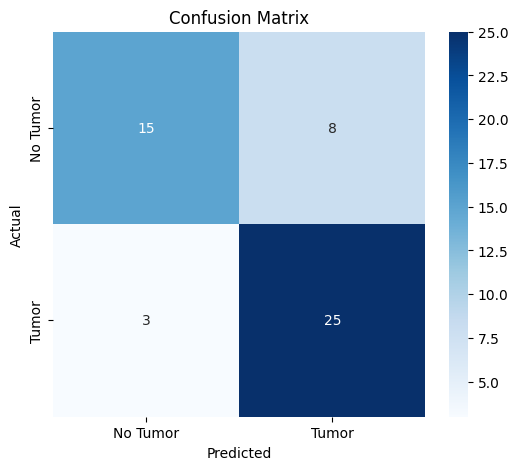

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


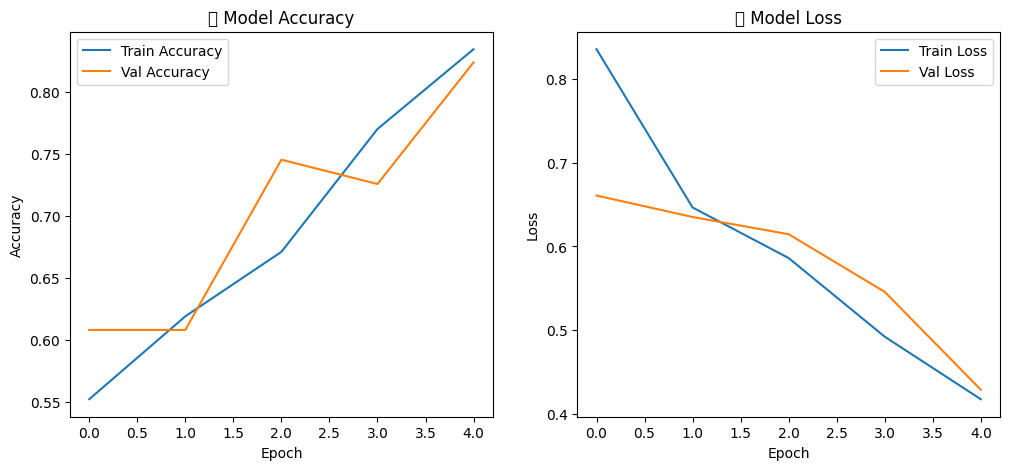

💾 Model saved as 'brain_tumor_cnn_model.h5'


In [1]:
# Step 1: Upload and unzip the dataset
from google.colab import files
uploaded = files.upload()

import zipfile, os

zip_path = 'archive (1).zip'
extract_path = '/content/brain_tumor_data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Imports
import cv2
import numpy as np
import imutils
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Step 3: Function to crop brain region
def crop_brain_contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) == 0:
        return image
    c = max(cnts, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    return new_image

# Step 4: Load and preprocess data
def load_images_from_folders(folders, image_size=(240, 240)):
    X, y = [], []
    for label, folder in enumerate(folders):  # 0 = no, 1 = yes
        for root, _, files in os.walk(folder):
            for file in files:
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = crop_brain_contour(img)
                img = cv2.resize(img, image_size)
                img = img / 255.0
                X.append(img)
                y.append(label % 2)  # Ensure binary label
    return np.array(X), np.array(y)

yes_folder = os.path.join(extract_path, 'yes')
no_folder = os.path.join(extract_path, 'no')
yes_btd = os.path.join(extract_path, 'brain_tumor_dataset', 'yes')
no_btd = os.path.join(extract_path, 'brain_tumor_dataset', 'no')

X, y = load_images_from_folders([no_folder, yes_folder, no_btd, yes_btd])
X, y = shuffle(X, y, random_state=42)

print(f"✅ Total images: {X.shape[0]}")
print(f"🖼️ Image shape: {X.shape[1:]}, 🎯 Labels shape: {y.shape}")

# Step 5: Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 6: Build CNN model
def create_model(input_shape):
    inp = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inp)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model(X_train.shape[1:])
model.summary()

# Step 7: Train model (reduced to 5 epochs)
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)

# Step 8: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {round(accuracy * 100, 2)}%")

# Step 9: Performance Metrics
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("🧾 Unique labels in y_test:", np.unique(y_test))
print("🧾 Unique predictions:", np.unique(y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# F1-Score (binary)
f1 = f1_score(y_test, y_pred, average='binary')
print(f"🎯 F1-Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 10: Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('brain_tumor_cnn_model.h5')
print("💾 Model saved as 'brain_tumor_cnn_model.h5'")
